### <div align= 'center'>**SVM (Support Vector Machine)**</div>

Support Vector Machine (SVM) is a **supervised learning algorithm** used for **classification**, **regression**, and **outlier detection** tasks. It works by finding the optimal decision boundary (hyperplane) that maximizes the margin between different classes.

---

### **1. Key Terminology**

1. **Hyperplane**:
   - A decision boundary that separates different classes in the feature space.
   - Represented by the equation $ w \cdot x + b = 0 $ in linear classification.

2. **Support Vectors**:
   - The closest data points to the hyperplane.
   - These points are crucial for determining the hyperplane and margin.

3. **Margin**:
   - The distance between the hyperplane and the support vectors.
   - SVM aims to maximize this margin for better classification performance.

4. **Kernel**:
   - A function that maps data to a higher-dimensional space, enabling SVM to handle non-linearly separable data.

5. **Hard Margin**:
   - A maximum-margin hyperplane that perfectly separates the data without misclassifications.

6. **Soft Margin**:
   - Allows some misclassifications by introducing slack variables, balancing margin maximization and misclassification penalties.

7. **C (Regularization Parameter)**:
   - Balances margin maximization and misclassification penalties.
   - A higher $ C $ value enforces a stricter penalty for misclassifications.

---

### **2. Types of SVM**

1. **Linear SVM**:
   - Used when the data is linearly separable.
   - The decision boundary is a straight line (in 2D) or a hyperplane (in higher dimensions).

2. **Non-Linear SVM**:
   - Used when the data is not linearly separable.
   - Uses the **Kernel Trick** to transform the data into a higher-dimensional space where it becomes linearly separable.

---

### **3. Python Implementation**

Below is the Python implementation of SVM using the **Iris dataset** for classification:

---

#### **3.1 Import Required Libraries**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### **3.2 Load the Dataset**

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target

print("Feature Names:", iris.feature_names[:2])
print("Target Names:", iris.target_names)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Feature Names: ['sepal length (cm)', 'sepal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']
Shape of X: (150, 2)
Shape of y: (150,)


#### **3.3 Split the Data into Training and Testing Sets**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)

Training Set Size: (120, 2)
Testing Set Size: (30, 2)


#### **3.4 Train the SVM Model**

In [4]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)  
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

#### **3.5 Make Predictions**

In [5]:
y_pred = svm_model.predict(X_test)

#### **3.6 Evaluate the Model**

In [6]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9000
Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



#### **3.7 Visualize the Decision Boundary**

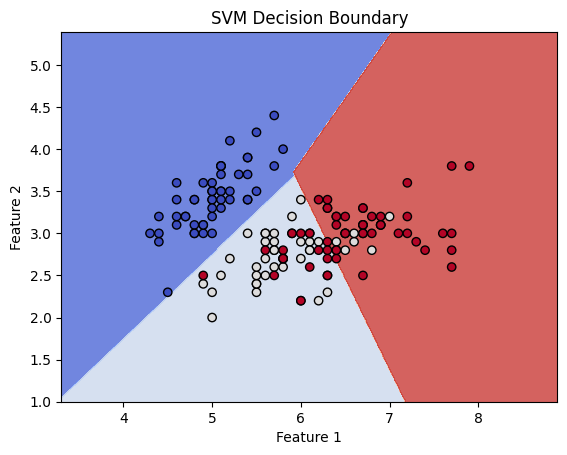

In [7]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, svm_model)

---

### **4. Summary**
- **SVM** is a powerful supervised learning algorithm used for classification and regression tasks.
- It works by finding the optimal hyperplane that maximizes the margin between classes.
- The **Kernel Trick** enables SVM to handle non-linearly separable data by mapping it to a higher-dimensional space.

**Visualization**:
   - A plot showing the decision boundary separating the classes.